### Imports

In [226]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
pd.set_option('display.max_columns', None)
%matplotlib inline

### Loading Data

In [227]:
actor = pd.read_csv(f'data/actor.csv')
category = pd.read_csv(f'data/category.csv')
film = pd.read_csv(f'data/film.csv')
inventory = pd.read_csv(f'data/inventory.csv')
language = pd.read_csv(f'data/language.csv')
hdd = pd.read_csv(f'data/old_HDD.csv')
rental = pd.read_csv(f'data/rental.csv')

#### Info Function

In [228]:
def csvinfo(df):
    print('Shape: ')
    print(df.shape)
    print()
    print('Info: ')
    print(df.info(memory_usage = 'deep'))
    print()
    print('Dupes: ')
    print(df.duplicated().sum())
    print()
    print('Describe: ')
    stats = df.describe(include = 'all').T
    stats['IQR'] = stats['75%'] - stats['25%']
    print(stats)
    print()
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

    plt.show()


#### Cleaning Function

In [229]:
def csvclean(df):
    print(df.columns)
    print()
    # Clean up column names

    strip_dict = {}
    for i,j in enumerate(df.columns):
        strip_dict[j] = j.strip()

    df.rename(columns = strip_dict,inplace = True)
    
    # Clean up strings inside columns
    for i in df.columns:
        try:
            df[i] = df[i].str.strip()
        except:
            continue
    
    # Constant columns
    cons_cols = []

    for c in df.select_dtypes(include=['object',np.number]):   # para cada columna NO numerica...
    
        if len(df[c].unique())==1:
            cons_cols.append(c)
    print('Constant columns: ', cons_cols)
    print()
    
    # Low variance columns

    low_var_cols=[]

    for c in df.select_dtypes(include=np.number):   # para cada columna numerica...
    
        lowest = df[c].min()
    
        per_90=np.percentile(df[c], 90)
    
        if lowest >= per_90:
            low_var_cols.append(c)
    print('Low variance columns: ', low_var_cols)
    print()
    print('NaN percentage')
    nan_cols = (df.isna().mean() * 100)[(df.isna().mean() * 100) > 0]
    print(nan_cols)
    print()
    
    
    return cons_cols, low_var_cols, nan_cols
    

## Actors Analysis

#### Info

Shape: 
(200, 4)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   actor_id     200 non-null    int64 
 1   first_name   200 non-null    object
 2   last_name    200 non-null    object
 3   last_update  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 41.0 KB
None

Dupes: 
0

Describe: 
             count unique                  top freq   mean        std  min  \
actor_id     200.0    NaN                  NaN  NaN  100.5  57.879185  1.0   
first_name     200    128             PENELOPE    4    NaN        NaN  NaN   
last_name      200    121               KILMER    5    NaN        NaN  NaN   
last_update    200      1  2006-02-15 04:34:33  200    NaN        NaN  NaN   

               25%    50%     75%    max   IQR  
actor_id     50.75  100.5  150.25  200.0  99.5  
first_name     NaN    NaN     NaN    NaN   NaN  
last_name

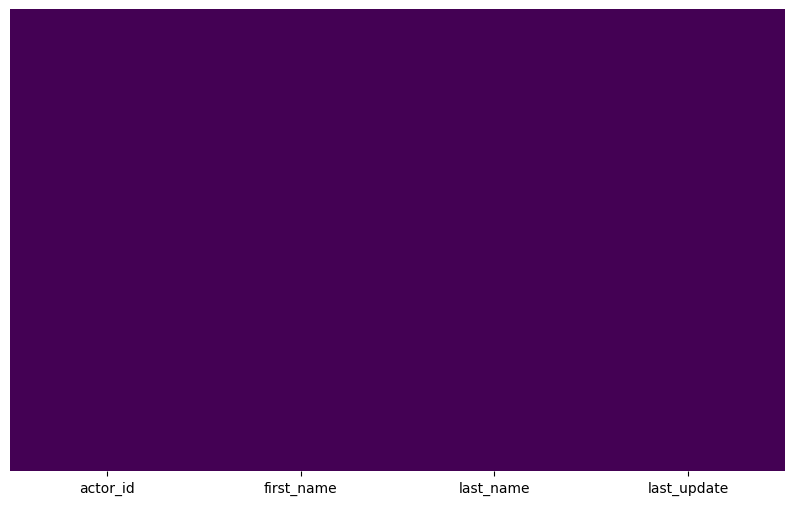

In [230]:
csvinfo(actor)

#### Cleaning

In [231]:
cons, lowv, nans = csvclean(actor)

Index(['actor_id', 'first_name', 'last_name', 'last_update'], dtype='object')

Constant columns:  ['last_update']

Low variance columns:  []

NaN percentage
Series([], dtype: float64)



In [232]:
actor.drop(labels=cons,axis=1,inplace=True)

In [233]:
actor.head()

,actor_id,first_name,last_name
0,1,PENELOPE,GUINESS
1,2,NICK,WAHLBERG
2,3,ED,CHASE
3,4,JENNIFER,DAVIS
4,5,JOHNNY,LOLLOBRIGIDA


In [234]:
actor.to_csv(f'data/clean_data/actor.csv',index=False)

## Category Analysis

#### Info

Shape: 
(16, 3)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  16 non-null     int64 
 1   name         16 non-null     object
 2   last_update  16 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4 KB
None

Dupes: 
0

Describe: 
            count unique                  top freq mean       std  min   25%  \
category_id  16.0    NaN                  NaN  NaN  8.5  4.760952  1.0  4.75   
name           16     16               Action    1  NaN       NaN  NaN   NaN   
last_update    16      1  2006-02-15 04:46:27   16  NaN       NaN  NaN   NaN   

             50%    75%   max  IQR  
category_id  8.5  12.25  16.0  7.5  
name         NaN    NaN   NaN  NaN  
last_update  NaN    NaN   NaN  NaN  



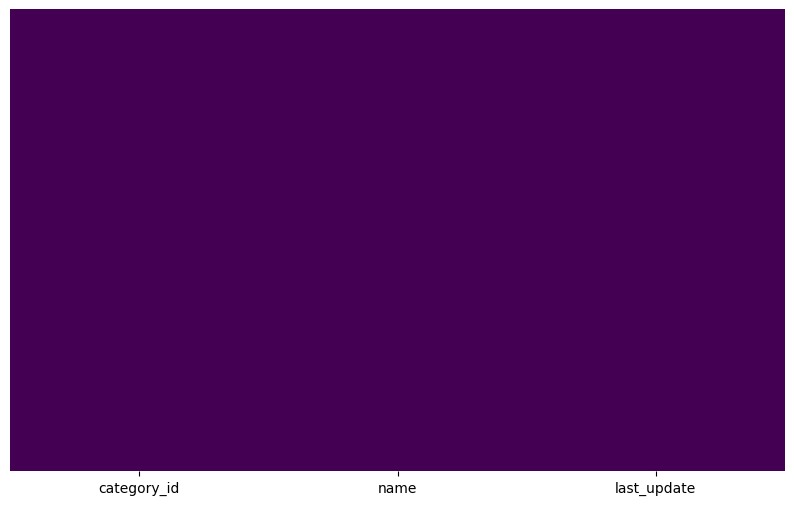

In [235]:
csvinfo(category)

#### Cleaning

In [236]:
cons, lowv, nans = csvclean(category)

Index(['category_id', 'name', 'last_update'], dtype='object')

Constant columns:  ['last_update']

Low variance columns:  []

NaN percentage
Series([], dtype: float64)



In [237]:
category.drop(labels=cons,axis=1,inplace=True)

In [238]:
category.head()

,category_id,name
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy


In [239]:
category.to_csv(f'data/clean_data/category.csv',index=False)

## Film Analysis

#### Info

Shape: 
(1000, 13)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   description           1000 non-null   object 
 3   release_year          1000 non-null   int64  
 4   language_id           1000 non-null   int64  
 5   original_language_id  0 non-null      float64
 6   rental_duration       1000 non-null   int64  
 7   rental_rate           1000 non-null   float64
 8   length                1000 non-null   int64  
 9   replacement_cost      1000 non-null   float64
 10  rating                1000 non-null   object 
 11  special_features      1000 non-null   object 
 12  last_update           1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 495.3 KB
None

Dupes: 
0

Describe: 
           

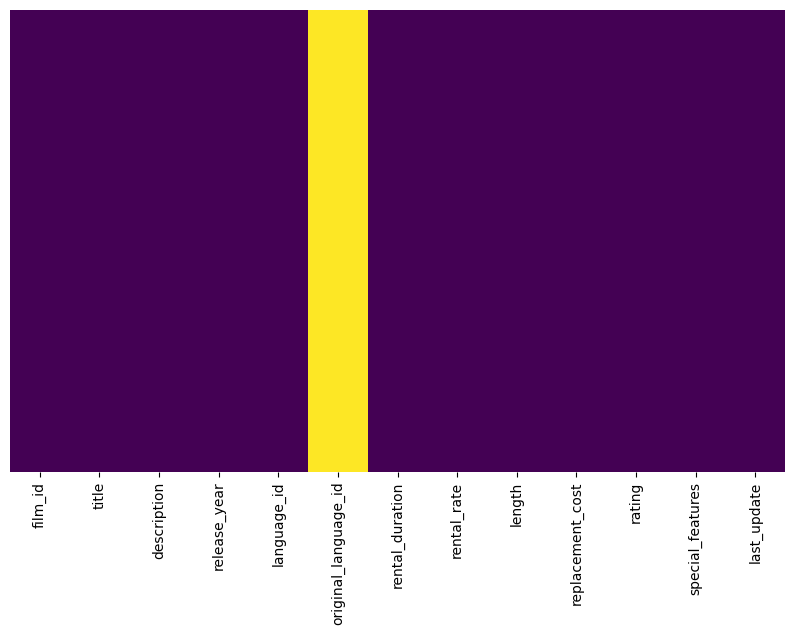

In [240]:
csvinfo(film)

#### Cleaning

In [241]:
cons, lowv, nans = csvclean(film)

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update'],
      dtype='object')

Constant columns:  ['release_year', 'language_id', 'original_language_id', 'last_update']

Low variance columns:  ['release_year', 'language_id']

NaN percentage
original_language_id    100.0
dtype: float64



In [242]:
film.drop(labels=['release_year', 'original_language_id', 'last_update'],axis=1,inplace=True)
#film.drop(labels=lowv,axis=1,inplace=True)
#film.drop(labels=nans.index,axis=1,inplace=True)


In [243]:

# Clean special features

film['special_features.deleted_scenes'] = 0
film['special_features.commentaries'] = 0
film['special_features.behind_the_scenes'] = 0
film['special_features.trailers'] = 0

for ind,row in enumerate(film['special_features']):
    if 'Deleted' in row:
        film.at[ind,'special_features.deleted_scenes']=1
    if 'Behind' in row:
        film.at[ind,'special_features.behind_the_scenes']=1
    if 'Commentar' in row:
        film.at[ind,'special_features.commentaries']=1
    if 'Trailer' in row:
        film.at[ind,'special_features.trailers']=1


film.drop(labels='special_features',axis=1,inplace=True)

In [244]:
film.head()

,film_id,title,description,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features.deleted_scenes,special_features.commentaries,special_features.behind_the_scenes,special_features.trailers
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,1,6,0.99,86,20.99,PG,1,0,1,0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,1,3,4.99,48,12.99,G,1,0,0,1
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,1,7,2.99,50,18.99,NC-17,1,0,0,1
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,1,5,2.99,117,26.99,G,0,1,1,0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,1,6,2.99,130,22.99,G,1,0,0,0


In [245]:
film.to_csv(f'data/clean_data/film.csv',index=False)

## Inventory Analysis

#### Info

Shape: 
(1000, 4)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  1000 non-null   int64 
 1   film_id       1000 non-null   int64 
 2   store_id      1000 non-null   int64 
 3   last_update   1000 non-null   object
dtypes: int64(3), object(1)
memory usage: 97.8 KB
None

Dupes: 
0

Describe: 
               count unique                  top  freq     mean         std  \
inventory_id  1000.0    NaN                  NaN   NaN    500.5  288.819436   
film_id       1000.0    NaN                  NaN   NaN  109.866   63.862042   
store_id      1000.0    NaN                  NaN   NaN    1.497    0.500241   
last_update     1000      1  2006-02-15 05:09:17  1000      NaN         NaN   

              min     25%    50%     75%     max    IQR  
inventory_id  1.0  250.75  500.5  750.25  1000.0  499.5  
film_id       1.0    56.0  

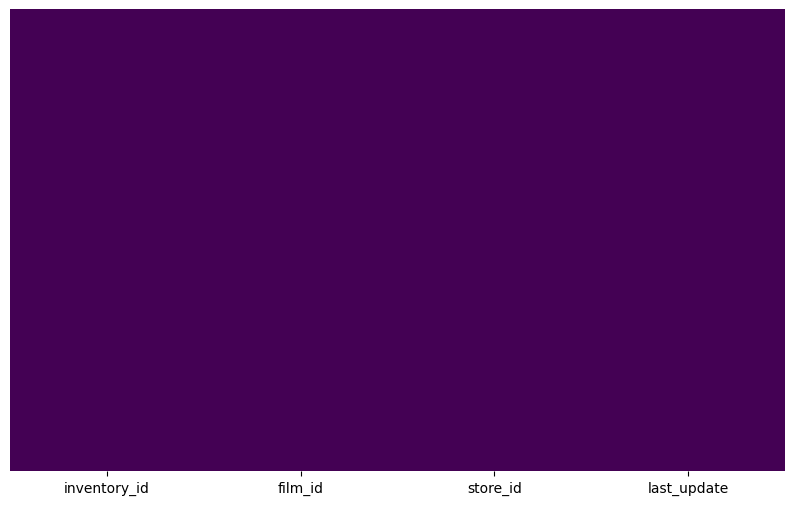

In [246]:
csvinfo(inventory)

#### Cleaning

In [247]:
cons, lowv, nans = csvclean(inventory)

Index(['inventory_id', 'film_id', 'store_id', 'last_update'], dtype='object')

Constant columns:  ['last_update']

Low variance columns:  []

NaN percentage
Series([], dtype: float64)



In [248]:
inventory.drop(labels=cons,axis=1,inplace=True)

In [249]:
inventory.head()

,inventory_id,film_id,store_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,2


In [250]:
inventory.to_csv(f'data/clean_data/inventory.csv',index=False)

## Language Analysis

#### Info

Shape: 
(6, 3)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language_id  6 non-null      int64 
 1   name         6 non-null      object
 2   last_update  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 1016.0 bytes
None

Dupes: 
0

Describe: 
            count unique                  top freq mean       std  min   25%  \
language_id   6.0    NaN                  NaN  NaN  3.5  1.870829  1.0  2.25   
name            6      6              English    1  NaN       NaN  NaN   NaN   
last_update     6      1  2006-02-15 05:02:19    6  NaN       NaN  NaN   NaN   

             50%   75%  max  IQR  
language_id  3.5  4.75  6.0  2.5  
name         NaN   NaN  NaN  NaN  
last_update  NaN   NaN  NaN  NaN  



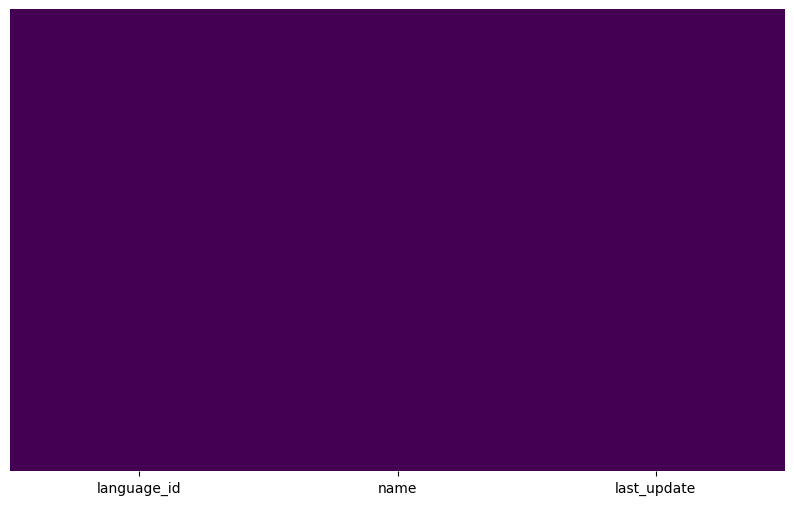

In [251]:
csvinfo(language)

#### Cleaning

In [252]:
cons, lowv, nans = csvclean(language)

Index(['language_id', 'name', 'last_update'], dtype='object')

Constant columns:  ['last_update']

Low variance columns:  []

NaN percentage
Series([], dtype: float64)



In [253]:
language.drop(labels=cons,axis=1,inplace=True)

In [254]:
language.head()

,language_id,name
0,1,English
1,2,Italian
2,3,Japanese
3,4,Mandarin
4,5,French


In [255]:
language.to_csv(f'data/clean_data/language.csv',index=False)

## Old_HDD Analysis

#### Info

Shape: 
(1000, 5)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   first_name    1000 non-null   object
 1   last_name     1000 non-null   object
 2   title         1000 non-null   object
 3   release_year  1000 non-null   int64 
 4   category_id   1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 207.6 KB
None

Dupes: 
0

Describe: 
               count unique                top freq    mean       std     min  \
first_name      1000     38             SANDRA   56     NaN       NaN     NaN   
last_name       1000     37            OLIVIER   53     NaN       NaN     NaN   
title           1000    614  BOONDOCK BALLROOM    6     NaN       NaN     NaN   
release_year  1000.0    NaN                NaN  NaN  2006.0       0.0  2006.0   
category_id   1000.0    NaN                NaN  NaN   8.355  4.726872     1.0   

         

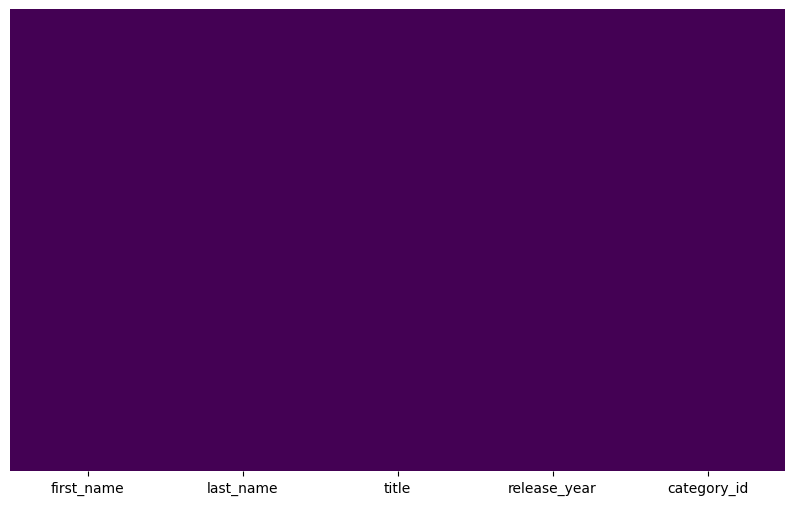

In [256]:
csvinfo(hdd)

#### Cleaning

In [257]:
cons, lowv, nans = csvclean(hdd)

Index(['first_name', 'last_name', 'title', 'release_year', 'category_id'], dtype='object')

Constant columns:  ['release_year']

Low variance columns:  ['release_year']

NaN percentage
Series([], dtype: float64)



In [258]:
hdd.drop(labels=cons,axis=1,inplace=True)

In [259]:
hdd.head()

,first_name,last_name,title,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2
2,PENELOPE,GUINESS,ANGELS LIFE,13
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,10
4,PENELOPE,GUINESS,CHEAPER CLYDE,14


##### Merge Keys

In [260]:
# add IDs to HDD
hdd = pd.merge(hdd,actor[['first_name','last_name','actor_id']], how='left',left_on=['first_name','last_name'],right_on=['first_name','last_name'])
hdd = pd.merge(hdd,film[['film_id','title']], how='left',left_on=['title'],right_on=['title'])

In [261]:
hdd.drop(labels=['first_name','last_name','title'],axis=1,inplace=True)

In [262]:
hdd.to_csv(f'data/clean_data/old_hdd.csv',index=False)

## Rental Analysis

#### Info

Shape: 
(1000, 7)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rental_id     1000 non-null   int64 
 1   rental_date   1000 non-null   object
 2   inventory_id  1000 non-null   int64 
 3   customer_id   1000 non-null   int64 
 4   return_date   1000 non-null   object
 5   staff_id      1000 non-null   int64 
 6   last_update   1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 254.0 KB
None

Dupes: 
0

Describe: 
               count unique                  top  freq      mean          std  \
rental_id     1000.0    NaN                  NaN   NaN    501.18    289.19665   
rental_date     1000    999  2005-05-30 14:47:31     2       NaN          NaN   
inventory_id  1000.0    NaN                  NaN   NaN  2258.179  1314.667454   
customer_id   1000.0    NaN                  NaN   NaN   296.408   172.509319   
return_

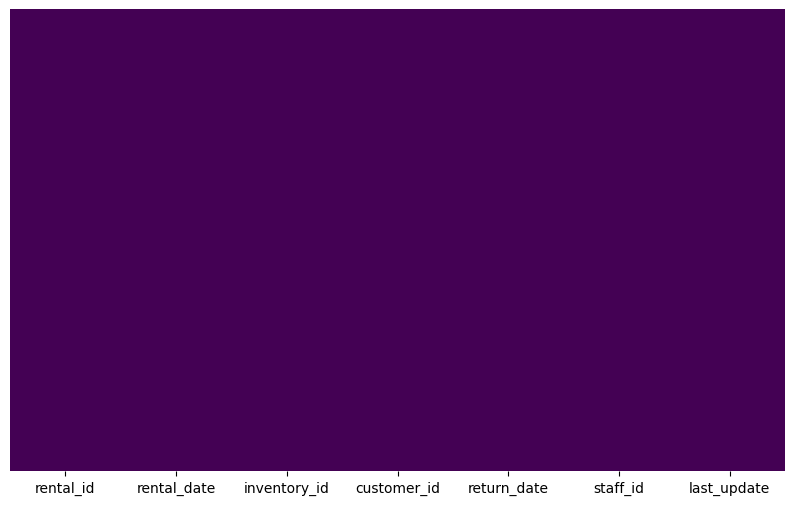

In [263]:
csvinfo(rental)

In [264]:
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


#### Cleaning

In [265]:
cons, lowv, nans = csvclean(rental)

Index(['rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'last_update'],
      dtype='object')

Constant columns:  ['last_update']

Low variance columns:  []

NaN percentage
Series([], dtype: float64)



In [266]:
rental.drop(labels=cons,axis=1,inplace=True)

##### Date time format, calculated columns 'Rental time' and 'Days rented'

In [267]:
rental['rental_date'] =  pd.to_datetime(rental['rental_date'], format='%Y%m%d %H:%M:%S')
rental['return_date'] =  pd.to_datetime(rental['return_date'], format='%Y%m%d %H:%M:%S')

In [268]:
rental['rental_time'] = rental['return_date'] - rental['rental_date']
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,rental_time
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,1 days 23:11:00
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,3 days 20:46:00
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,7 days 23:09:00
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,9 days 02:39:00
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,8 days 05:28:00


In [269]:
rental['days_rented'] = 0
for i in range(len(rental['rental_time'])):
    x = rental['rental_time'][rental['rental_time'].index == i]
    x = str(x)
    if x == '':
        rental.at[i,'days_rented'] = 0
        continue
    try:
        x = float(x.split()[1]) + float(x.split('\n')[0][-8:-6]) / 24
    except:
        x = float(x.split()[1])
    rental.at[i,'days_rented'] = round(x,1)
    


In [271]:
rental.to_csv(f'data/clean_data/rental.csv',index=False)

In [272]:
film.head()

,film_id,title,description,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features.deleted_scenes,special_features.commentaries,special_features.behind_the_scenes,special_features.trailers
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,1,6,0.99,86,20.99,PG,1,0,1,0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,1,3,4.99,48,12.99,G,1,0,0,1
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,1,7,2.99,50,18.99,NC-17,1,0,0,1
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,1,5,2.99,117,26.99,G,0,1,1,0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,1,6,2.99,130,22.99,G,1,0,0,0


# END